<a href="https://colab.research.google.com/github/wujulie/ML__homework/blob/main/clusting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [ ]:
# Get the keys of the `digits` data
print(digits.keys())
# Print out the data
print(digits.data)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
# Print out the target values
print(digits.target)
Y=digits.target
number_digits = len(np.unique(digits.target))
print(number_digits)#得知所有的目標值有10個相異值

[0 1 2 ... 8 9 8]
10


In [ ]:
from sklearn.cluster import KMeans
nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]
inertias = []
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(digits.data)
    inertias.append(km.inertia_)


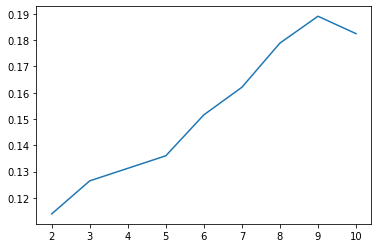

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
avg_silhouettes = []
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Yk = km.fit_predict(digits.data)
    avg_silhouettes.append(silhouette_score(digits.data, Yk))
plt.plot(nb_clusters, avg_silhouettes)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

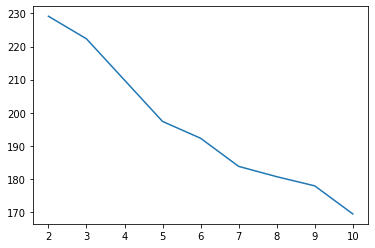

In [ ]:
from sklearn.metrics import calinski_harabaz_score
ch_scores = []
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Yk = km.fit_predict(digits.data)
    ch_scores.append(calinski_harabaz_score(digits.data, Yk))
plt.plot(nb_clusters, ch_scores)

In [ ]:
from sklearn.metrics import homogeneity_score
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
km = KMeans(n_clusters=10)
Yk = km.fit_predict(digits.data)
print('KMeans')
print('Homogeneity score:',homogeneity_score(Y, Yk))
print('Completeness_score:',completeness_score(Y, Yk))
print('Adjusted_rand_score:',adjusted_rand_score(Y, Yk))


KMeans_homogeneity score: 0.7364793130062923
KMeans_completeness_score: 0.7435437307079215
KMeans_adjusted_rand_score: 0.6641872101826876


In [ ]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.1)
Yp = dbs.fit_predict(digits.data)
print('DBSCAN')
print('Homogeneity score:',homogeneity_score(Y, Yp))
print('Completeness_score:',completeness_score(Y, Yp))
print('Adjusted_rand_score:',adjusted_rand_score(Y, Yp))

DBSCAN
Homogeneity score: 3.616394280070181e-17
Completeness_score: 1.0
Adjusted_rand_score: 0.0


In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10, affinity='nearest_neighbors')
Ys = sc.fit_predict(digits.data)
print('SpectralClustering')
print('Homogeneity score:',homogeneity_score(Y, Ys))
#print('calinski harabaz score:',calinski_harabaz_score(Y,Yk))
print('Completeness_score:',completeness_score(Y, Ys))
print('Adjusted_rand_score:',adjusted_rand_score(Y, Ys))

SpectralClustering
Homogeneity score: 0.8316906184695789
Completeness_score: 0.8766144929016135
Adjusted_rand_score: 0.7564608880380487


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# complete linkage
ac = AgglomerativeClustering(n_clusters=10, linkage='complete')
Y_ac = ac.fit_predict(digits.data)

In [ ]:
print('AgglomerativeClustering')
print('Homogeneity_score::',homogeneity_score(Y, Y_ac))
print('completeness_score:',completeness_score(Y, Y_ac))
print('adjusted_rand_score:',adjusted_rand_score(Y, Y_ac))

AgglomerativeClustering
Homogeneity_score:: 0.5905493882538358
completeness_score: 0.6377720419796353
adjusted_rand_score: 0.4286888142937745


n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.38s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	0.29s	69907	0.633	0.674	0.653	0.518	0.649	0.131
PCA-based	0.05s	70768	0.668	0.695	0.681	0.558	0.678	0.142
__________________________________________________________________________________


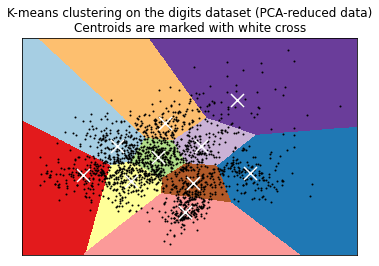

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()